### 0722 과제 2번

- 시도별 전출입 인구수
	- 데이터 : 1970 ~ 2017년 이동 인구수
	- 대구에서 타지역으로 이동 인구수 분석 및 시각화
	- 전국으로 봤을 때 가장 많이 이동이 발생한 지역

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 한글폰트 설정 => 폰트 메니저 모듈 사용
from matplotlib import font_manager as fm
from matplotlib import rc

# 사용할 폰트 파일
font_path = r'C:\Users\PC\AppData\Local\Microsoft\Windows\Fonts\NanumMyeongjo.ttf'

# 폰트 패밀리 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font',family=font_name)


In [4]:
file_path = '../data/시도별 전출입 인구수.xlsx'
data_df = pd.read_excel(file_path)

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    18 non-null     object
 1   전입지별    324 non-null    object
 2   1970    325 non-null    object
 3   1971    325 non-null    object
 4   1972    325 non-null    object
 5   1973    325 non-null    object
 6   1974    325 non-null    object
 7   1975    325 non-null    object
 8   1976    325 non-null    object
 9   1977    325 non-null    object
 10  1978    325 non-null    object
 11  1979    325 non-null    object
 12  1980    325 non-null    object
 13  1981    325 non-null    object
 14  1982    325 non-null    object
 15  1983    325 non-null    object
 16  1984    322 non-null    object
 17  1985    322 non-null    object
 18  1986    322 non-null    object
 19  1987    325 non-null    object
 20  1988    325 non-null    object
 21  1989    325 non-null    object
 22  1990    325 non-null    ob

In [6]:
data_df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [14]:
# 대구 데이터 찾기
data_deagu = data_df.iloc[55:73, :]
data_deagu

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
55,대구광역시,전국,-,-,-,-,-,-,-,-,...,422676,411288,382657,383310,359206,363224,365739,364364,337488,333118
56,NaN,서울특별시,-,-,-,-,-,-,-,-,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
57,NaN,부산광역시,-,-,-,-,-,-,-,-,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
58,NaN,대구광역시,-,-,-,-,-,-,-,-,...,311113,298755,274649,276495,254661,258107,252642,259185,240722,236143
59,NaN,인천광역시,-,-,-,-,-,-,-,-,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
60,NaN,광주광역시,-,-,-,-,-,-,-,-,...,563,624,527,577,711,622,902,629,547,515
61,NaN,대전광역시,-,-,-,-,-,-,-,-,...,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
62,NaN,울산광역시,-,-,-,-,-,-,-,-,...,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
63,NaN,세종특별자치시,-,-,-,-,-,-,-,-,...,-,-,-,-,261,233,526,879,642,827
64,NaN,경기도,-,-,-,-,-,-,-,-,...,13724,14534,14596,13320,13581,13659,12813,12322,11918,12354


In [15]:
data_deagu.isna().sum()

전출지별    17
전입지별     0
1970     0
1971     0
1972     0
1973     0
1974     0
1975     0
1976     0
1977     0
1978     0
1979     0
1980     0
1981     0
1982     0
1983     0
1984     0
1985     0
1986     0
1987     0
1988     0
1989     0
1990     0
1991     0
1992     0
1993     0
1994     0
1995     0
1996     0
1997     0
1998     0
1999     0
2000     0
2001     0
2002     0
2003     0
2004     0
2005     0
2006     0
2007     0
2008     0
2009     0
2010     0
2011     0
2012     0
2013     0
2014     0
2015     0
2016     0
2017     0
dtype: int64

In [18]:
data_deagu = data_deagu.ffill()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28404\2987149202.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_deagu = data_deagu.ffill()


In [22]:
# 대구에서 떠난 인구수 분석하는 건데 전출지는 필요없지 않나...
data_deagu.drop(columns='전출지별', inplace=True)

In [25]:
# 결측치 '-' 처리
data_deagu = data_deagu.replace('-', pd.NA)
data_deagu.fillna(0, inplace=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28404\1507875440.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_deagu.fillna(0, inplace=True)


In [26]:
data_deagu

,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
55,전국,0,0,0,0,0,0,0,0,0,...,422676,411288,382657,383310,359206,363224,365739,364364,337488,333118
56,서울특별시,0,0,0,0,0,0,0,0,0,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
57,부산광역시,0,0,0,0,0,0,0,0,0,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
58,대구광역시,0,0,0,0,0,0,0,0,0,...,311113,298755,274649,276495,254661,258107,252642,259185,240722,236143
59,인천광역시,0,0,0,0,0,0,0,0,0,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
60,광주광역시,0,0,0,0,0,0,0,0,0,...,563,624,527,577,711,622,902,629,547,515
61,대전광역시,0,0,0,0,0,0,0,0,0,...,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
62,울산광역시,0,0,0,0,0,0,0,0,0,...,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
63,세종특별자치시,0,0,0,0,0,0,0,0,0,...,0,0,0,0,261,233,526,879,642,827
64,경기도,0,0,0,0,0,0,0,0,0,...,13724,14534,14596,13320,13581,13659,12813,12322,11918,12354


In [38]:
# data_deagu.set_index('전입지별', inplace=True)    # 이미 했다고 안되네
data_deagu

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,
전국,0,0,0,0,0,0,0,0,0,0,...,422676,411288,382657,383310,359206,363224,365739,364364,337488,333118
서울특별시,0,0,0,0,0,0,0,0,0,0,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
부산광역시,0,0,0,0,0,0,0,0,0,0,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
대구광역시,0,0,0,0,0,0,0,0,0,0,...,311113,298755,274649,276495,254661,258107,252642,259185,240722,236143
인천광역시,0,0,0,0,0,0,0,0,0,0,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
광주광역시,0,0,0,0,0,0,0,0,0,0,...,563,624,527,577,711,622,902,629,547,515
대전광역시,0,0,0,0,0,0,0,0,0,0,...,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
울산광역시,0,0,0,0,0,0,0,0,0,0,...,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
세종특별자치시,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,261,233,526,879,642,827


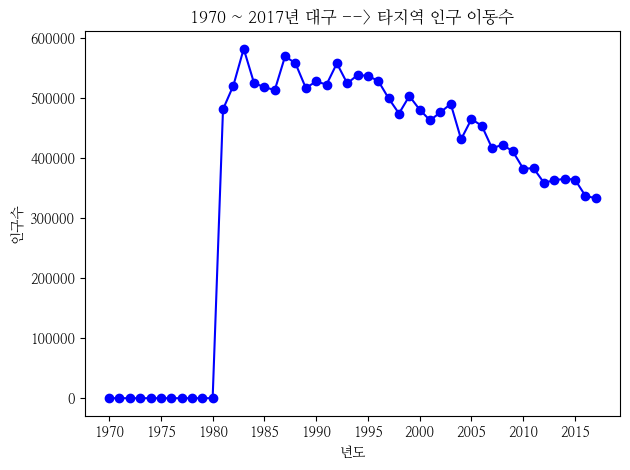

In [45]:
# 대구에서 타 지역으로 이동한 인구수 그리기
x_data = list(data_deagu.columns)
y_data = data_deagu.loc['전국'].to_list()

plt.plot(x_data, y_data, 'bo-')
plt.title('1970 ~ 2017년 대구 --> 타지역 인구 이동수')
plt.xlabel('년도')
plt.ylabel('인구수')
plt.xticks(np.arange(0, 47, 5), ['1970', '1975', '1980', '1985', '1990', '1995', '2000', '2005', '2010', '2015'])
plt.tight_layout()
plt.show()

- 대구에서는 1980년 이전에는 대구 밖으로 나가는 인원이 없었던 것으로 보임. 1980년 이후부터는 대구 밖으로 나가는 인구가 나타남.
- 대략 1995년까지는 그 수를 유지하다가 점점 감소하는 모습을 보임.

- 추측하면 일자리를 구하기 위해 사람들이 많이 떠나지 않았을까? 1980년대면 경제 성장 계획을 시행하고 있었을 시기와도 맞물린다고 생각함.    

In [52]:
# 전국 데이터
data_whole = data_df.iloc[1:19, :]

#  전출지는 전국이니 삭제
data_whole.drop(columns='전출지별', inplace=True)

data_whole.set_index('전입지별', inplace=True)
data_whole

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28404\862845120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_whole.drop(columns='전출지별', inplace=True)


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,
전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,8410276,7324380,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,3307439,2589667,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,895337,809483,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
대구광역시,-,-,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
인천광역시,-,-,-,-,-,-,-,-,-,-,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465
광주광역시,-,-,-,-,-,-,-,-,-,-,...,268757,293879,268574,260561,228612,226696,243066,224603,213176,208138
대전광역시,-,-,-,-,-,-,-,-,-,-,...,263532,252424,262432,264244,239635,230858,239559,220774,219252,211449
울산광역시,-,-,-,-,-,-,-,-,-,-,...,181662,159953,161146,164963,161433,159492,176015,170393,148190,135199
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,32784,23805,56526,83994,65052,82073


In [54]:
# 결측치 '-' 처리
data_whole.replace('-', pd.NA, inplace=True)
data_whole.fillna(0, inplace=True)
data_whole

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28404\2826260204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_whole.replace('-', pd.NA, inplace=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28404\2826260204.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_whole.fillna(0, inplace=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28404\2826260204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,
전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,8410276,7324380,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,3307439,2589667,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,895337,809483,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
대구광역시,0,0,0,0,0,0,0,0,0,0,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
인천광역시,0,0,0,0,0,0,0,0,0,0,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465
광주광역시,0,0,0,0,0,0,0,0,0,0,...,268757,293879,268574,260561,228612,226696,243066,224603,213176,208138
대전광역시,0,0,0,0,0,0,0,0,0,0,...,263532,252424,262432,264244,239635,230858,239559,220774,219252,211449
울산광역시,0,0,0,0,0,0,0,0,0,0,...,181662,159953,161146,164963,161433,159492,176015,170393,148190,135199
세종특별자치시,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,32784,23805,56526,83994,65052,82073


In [55]:
# 전입지별 이동인구의 합계를 구해보자
data_whole['total'] = 0
data_whole

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28404\618241597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_whole['total'] = 0


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,total
전입지별,,,,,,,,,,,,,,,,,,,,,
전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,8410276,7324380,...,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226,0
서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,3307439,2589667,...,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937,0
부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,895337,809483,...,519310,519334,508043,461042,478451,485710,507031,459015,439073,0
대구광역시,0,0,0,0,0,0,0,0,0,0,...,398626,370817,370563,348642,351873,350213,351424,328228,321182,0
인천광역시,0,0,0,0,0,0,0,0,0,0,...,478169,462051,499567,468666,461613,452297,473223,441646,409465,0
광주광역시,0,0,0,0,0,0,0,0,0,0,...,293879,268574,260561,228612,226696,243066,224603,213176,208138,0
대전광역시,0,0,0,0,0,0,0,0,0,0,...,252424,262432,264244,239635,230858,239559,220774,219252,211449,0
울산광역시,0,0,0,0,0,0,0,0,0,0,...,159953,161146,164963,161433,159492,176015,170393,148190,135199,0
세종특별자치시,0,0,0,0,0,0,0,0,0,0,...,0,0,0,32784,23805,56526,83994,65052,82073,0


In [63]:
carry = []
for idx in range(len(data_whole.index)):
    carry.append(data_whole.iloc[idx, :49].sum())

In [66]:
data_whole['total'] = carry
data_whole

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28404\2853210633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_whole['total'] = carry


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,total
전입지별,,,,,,,,,,,,,,,,,,,,,
전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,8410276,7324380,...,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226,391932793
서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,3307439,2589667,...,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937,109885155
부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,895337,809483,...,519310,519334,508043,461042,478451,485710,507031,459015,439073,31531929
대구광역시,0,0,0,0,0,0,0,0,0,0,...,398626,370817,370563,348642,351873,350213,351424,328228,321182,17346829
인천광역시,0,0,0,0,0,0,0,0,0,0,...,478169,462051,499567,468666,461613,452297,473223,441646,409465,17565815
광주광역시,0,0,0,0,0,0,0,0,0,0,...,293879,268574,260561,228612,226696,243066,224603,213176,208138,9156002
대전광역시,0,0,0,0,0,0,0,0,0,0,...,252424,262432,264244,239635,230858,239559,220774,219252,211449,8073781
울산광역시,0,0,0,0,0,0,0,0,0,0,...,159953,161146,164963,161433,159492,176015,170393,148190,135199,3561967
세종특별자치시,0,0,0,0,0,0,0,0,0,0,...,0,0,0,32784,23805,56526,83994,65052,82073,344234


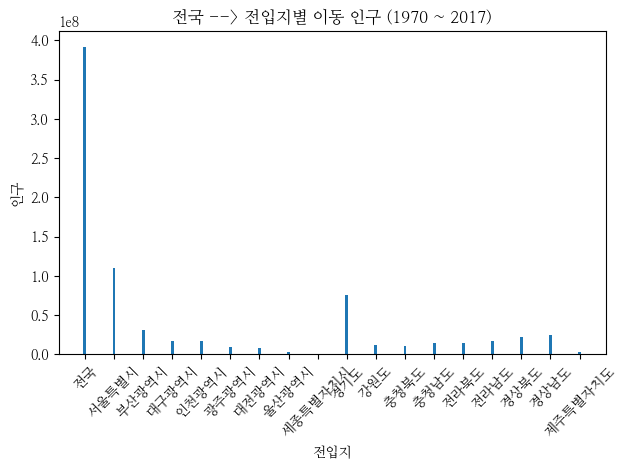

In [70]:
# 그래프 그리기
xdata = list(data_whole.index)
ydata = data_whole['total'].to_list()

plt.bar(xdata, ydata, width=0.1)
plt.title('전국 --> 전입지별 이동 인구 (1970 ~ 2017)')
plt.xlabel('전입지')
plt.ylabel('인구')
plt.xticks(np.arange(0,18,1), rotation=45)
plt.tight_layout()
plt.show()

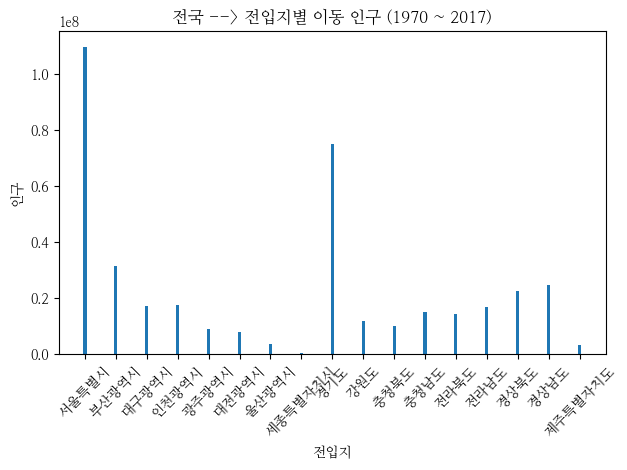

In [72]:
# 전국 데이터는 제외하고 데이터를 그림
data_whole_2 = data_whole.drop(index='전국')
data_whole_2

xdata = list(data_whole_2.index)
ydata = data_whole_2['total'].to_list()

plt.bar(xdata, ydata, width=0.1)
plt.title('전국 --> 전입지별 이동 인구 (1970 ~ 2017)')
plt.xlabel('전입지')
plt.ylabel('인구')
plt.xticks(np.arange(0,17,1), rotation=45)
plt.tight_layout()
plt.show()

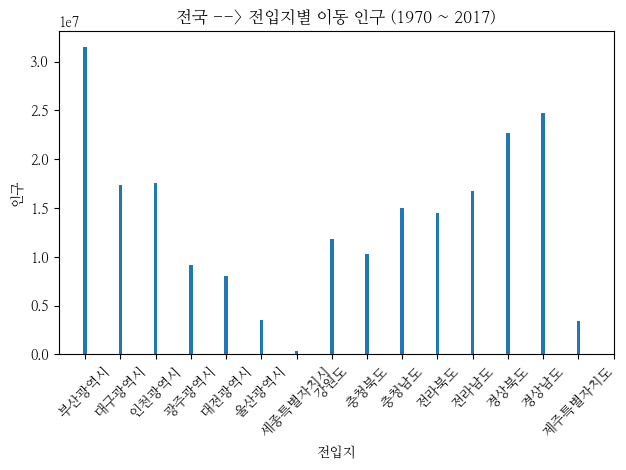

In [74]:
# 서울과 경기도를 제외하고
data_whole_3 = data_whole_2.drop(index=['서울특별시', '경기도'])
data_whole_3

xdata = list(data_whole_3.index)
ydata = data_whole_3['total'].to_list()

plt.bar(xdata, ydata, width=0.1)
plt.title('전국 --> 전입지별 이동 인구 (1970 ~ 2017)')
plt.xlabel('전입지')
plt.ylabel('인구')
plt.xticks(np.arange(0,16,1), rotation=45)
plt.tight_layout()
plt.show()

- 전국에서 가장 많은 인구수가 이동한 지역은 서울, 경기도, 부산 순으로 보여짐.